<a href="https://colab.research.google.com/github/1920039/seaborn-data/blob/master/KiseongLEE_diabetes_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 기본 환경 설정 및 데이터 전처리

**한글 폰트 설치하기**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (44.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and di

**런타임 다시 시작하기: 메뉴 런타임>런타임 다시 시작**

**라이브러리 import**

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
plt.rc('font',size='20' ,family='NanumBarunGothic')        # rc를 통해 한글 폰트 설정

**구글 드라이브 연결**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# /content/drive/My Drive/health/NHIS_OPEN_GJ_2016.csv

Mounted at /content/drive


**파일 읽어오기**

In [ ]:
# 데이터를 약 1만 건을 읽어오되, 대부분의 알고리즘에서 2천 건만 사용하고 끝부분 '기타'에서 1만 건으로 정확도 영향 점검
file = '/content/drive/My Drive/health/NHIS_OPEN_GJ_2016.csv'
data = pd.read_csv(file, encoding='cp949', nrows=11000, usecols=[2,3,4,5,6,12,14,18,21,23,25]) 
df_10k = pd.DataFrame(data)     # Light GBM, Keras에서 추가 점검용으로 사용
df_10k.head()     # 항상 head()로 데이터 앞부분 확인

,sex,age,location,height(5cms),weight(5cms),bp_contract,sugarbeforefood,LDL,kreatinin,ALT,smoking
0,1,10,27,175.0,75.0,140.0,91,177.0,0.9,30,3.0
1,2,11,41,160.0,65.0,138.0,105,122.0,0.9,17,1.0
2,2,11,43,150.0,55.0,138.0,93,150.0,0.7,19,1.0
3,1,12,48,175.0,70.0,124.0,93,123.0,1.0,39,2.0
4,2,6,11,160.0,50.0,121.0,96,130.0,0.7,7,1.0


**칼럼명 변경**

In [ ]:
df_10k.columns = ['성별','연령','시도','신장','체중','혈압','혈당','LDL','크레아티닌','ALT','흡연']

**데이터셋 정보 확인**

In [ ]:
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      11000 non-null  int64  
 1   연령      11000 non-null  int64  
 2   시도      11000 non-null  int64  
 3   신장      10994 non-null  float64
 4   체중      10994 non-null  float64
 5   혈압      10999 non-null  float64
 6   혈당      11000 non-null  int64  
 7   LDL     10976 non-null  float64
 8   크레아티닌   11000 non-null  float64
 9   ALT     11000 non-null  int64  
 10  흡연      10999 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 945.4 KB


**빈 칸이 있는 행 삭제**

In [ ]:
df_10k = df_10k.dropna()

**데이터셋 정보 확인**

In [ ]:
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10969 entries, 0 to 10999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      10969 non-null  int64  
 1   연령      10969 non-null  int64  
 2   시도      10969 non-null  int64  
 3   신장      10969 non-null  float64
 4   체중      10969 non-null  float64
 5   혈압      10969 non-null  float64
 6   혈당      10969 non-null  int64  
 7   LDL     10969 non-null  float64
 8   크레아티닌   10969 non-null  float64
 9   ALT     10969 non-null  int64  
 10  흡연      10969 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.0 MB


In [ ]:
df_10k.describe()

,성별,연령,시도,신장,체중,혈압,혈당,LDL,크레아티닌,ALT,흡연
count,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000
mean,1.461847,10.481630,33.788768,162.502507,63.197648,122.282797,99.901176,113.859878,0.872276,25.409700,1.623484
std,0.498565,2.849056,12.565908,9.405448,12.643118,14.464810,24.057657,39.355155,0.314165,21.493411,0.829843
min,1.000000,5.000000,11.000000,105.000000,25.000000,80.000000,40.000000,1.000000,0.100000,1.000000,1.000000
25%,1.000000,8.000000,27.000000,155.000000,55.000000,111.000000,88.000000,90.000000,0.700000,14.000000,1.000000
50%,1.000000,10.000000,41.000000,165.000000,60.000000,120.000000,95.000000,112.000000,0.900000,20.000000,1.000000
75%,2.000000,13.000000,43.000000,170.000000,70.000000,130.000000,105.000000,135.000000,1.000000,29.000000,2.000000
max,2.000000,18.000000,49.000000,195.000000,170.000000,210.000000,424.000000,1840.000000,12.500000,670.000000,3.000000


**연령대를 알아보기 쉽게 변환**

In [ ]:
df_10k['연령'] = df_10k['연령'].map({5:20, 6:20, 7:30, 8:30, 9:40, 10:40, 11:50, 12:50,
                         13:60, 14:60, 15:70, 16:70, 17:80, 18:80})   #20은 20대, 30은 30대...입니다

**체질량 칼럼 및 당뇨 칼럼 추가**

In [ ]:
df_10k['체질량'] = round(df_10k['체중'] / (df_10k['신장'] / 100)**2, 1)

In [ ]:
df_10k['당뇨'] = df_10k['혈당'] >= 126
df_10k

,성별,연령,시도,신장,체중,혈압,혈당,LDL,크레아티닌,ALT,흡연,체질량,당뇨
0,1,40,27,175.0,75.0,140.0,91,177.0,0.9,30,3.0,24.5,False
1,2,50,41,160.0,65.0,138.0,105,122.0,0.9,17,1.0,25.4,False
2,2,50,43,150.0,55.0,138.0,93,150.0,0.7,19,1.0,24.4,False
3,1,50,48,175.0,70.0,124.0,93,123.0,1.0,39,2.0,22.9,False
4,2,20,11,160.0,50.0,121.0,96,130.0,0.7,7,1.0,19.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,2,60,26,155.0,60.0,112.0,89,121.0,0.7,19,1.0,25.0,False
10996,1,60,26,160.0,65.0,101.0,135,194.0,0.8,19,3.0,25.4,True
10997,1,50,41,165.0,60.0,146.0,138,55.0,0.8,13,1.0,22.0,True
10998,1,50,42,170.0,65.0,130.0,129,87.0,0.8,27,3.0,22.5,True


**데이터 2천 건으로 분석을 수행하기 위해 'df'로 명명하고 X, y 구분**

In [ ]:
df = df_10k[:2000]

In [ ]:
X = df[['성별', '연령', '시도', '혈압', 'LDL', '크레아티닌', 'ALT', '흡연', '체질량']]
X

,성별,연령,시도,혈압,LDL,크레아티닌,ALT,흡연,체질량
0,1,40,27,140.0,177.0,0.9,30,3.0,24.5
1,2,50,41,138.0,122.0,0.9,17,1.0,25.4
2,2,50,43,138.0,150.0,0.7,19,1.0,24.4
3,1,50,48,124.0,123.0,1.0,39,2.0,22.9
4,2,20,11,121.0,130.0,0.7,7,1.0,19.5
...,...,...,...,...,...,...,...,...,...
2001,1,60,46,120.0,43.0,1.1,28,1.0,22.9
2002,2,80,11,144.0,67.0,0.9,21,1.0,24.4
2003,2,20,27,100.0,73.0,0.6,16,2.0,23.9
2004,2,40,11,104.0,96.0,0.9,25,1.0,22.9


In [ ]:
y = df['당뇨']
y

0       False
1       False
2       False
3       False
4       False
        ...  
2001    False
2002     True
2003    False
2004    False
2005    False
Name: 당뇨, Length: 2000, dtype: bool

**Train, Test 셋 구분**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)  ###############################
X_train.shape[0],X_test.shape[0], y_train.shape[0],y_test.shape[0]   # 행의 수 확인

(1600, 400, 1600, 400)

# 2-1. 보팅 앙상블: 하이퍼 파라미터 설정 없이 학습하기

**라이브러리 import 및 분류기 약어 설정**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics            

knn = KNeighborsClassifier()
svc = SVC(probability=True)  # probability=True 써야 soft 보팅 시 에러 없음
gnb = GaussianNB()
lgbm = LGBMClassifier()

**하드 보팅: 분류기별 가중치 1:1:0.5:1**

In [ ]:
hard_voting_model_1 = VotingClassifier(estimators=[
    ('KNN', knn), ('SVC', svc), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm)],
    weights=[1,1,0.5,1], voting='hard')            
hard_voting_model_1.fit(X_train, y_train)
hard_voting_predicted = hard_voting_model_1.predict(X_test)
print(metrics.classification_report(y_test, hard_voting_predicted))   
print('hard voting accuracy: %.8f' % accuracy_score(y_test, hard_voting_predicted))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.00      0.00      0.00        28

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.86      0.93      0.90       400

hard voting accuracy: 0.93000000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**모델이 True값을 예측하지 않아서 경고 메시지 발생(에러는 아님)**

**하드 보팅: 분류기별 가중치 1:1:1:1**

In [ ]:
hard_voting_model = VotingClassifier(estimators=[
    ('KNN', knn), ('SVC', svc), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm)],
    weights=[1,1,1,1], voting='hard')            
hard_voting_model.fit(X_train, y_train)
hard_voting_predicted = hard_voting_model.predict(X_test)
print(metrics.classification_report(y_test, hard_voting_predicted))   
print('hard voting accuracy: %.8f' % accuracy_score(y_test, hard_voting_predicted))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.00      0.00      0.00        28

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.86      0.93      0.90       400

hard voting accuracy: 0.93000000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**소프트 보팅: 분류기별 가중치 1:1:0.5:1**

In [ ]:
soft_voting_model_1 = VotingClassifier(estimators=[
    ('KNN', knn), ('SVC', svc), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm)],
    weights=[1,1,0.5,1], voting='soft')
soft_voting_model_1.fit(X_train, y_train)
soft_voting_predicted = soft_voting_model_1.predict(X_test)
print('soft voting accuracy: %.8f' % accuracy_score(y_test, soft_voting_predicted))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.00      0.00      0.00        28

    accuracy                           0.93       400
   macro avg       0.46      0.50      0.48       400
weighted avg       0.86      0.93      0.90       400

soft voting accuracy: 0.92750000


**소프트 보팅: 분류기별 가중치 1:1:1:1**

In [ ]:
soft_voting_model = VotingClassifier(estimators=[
    ('KNN', knn), ('SVC', svc), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm)],
    weights=[1,1,1,1], voting='soft')
soft_voting_model.fit(X_train, y_train)
soft_voting_predicted = soft_voting_model.predict(X_test)
print(metrics.classification_report(y_test, soft_voting_predicted))   
print('soft voting accuracy: %.8f' % accuracy_score(y_test, soft_voting_predicted))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.00      0.00      0.00        28

    accuracy                           0.93       400
   macro avg       0.46      0.50      0.48       400
weighted avg       0.86      0.93      0.90       400

soft voting accuracy: 0.92750000


# 2-2. 보팅 앙상블: 하이퍼 파라미터 설정하여 학습하기

### 기반 분류기 1: KNN

**라이브러리를 import하고 K 후보 도출**

In [ ]:
from sklearn.model_selection import cross_val_score

## 예측값이 가장 높은 최적의 k 찾기
# 우선 k 후보들을 도출하는데, k의 범위는 3부터 학습 데이터의 절반까지 지정
max_k_range = X_train.shape[0] // 2
k_list = list(np.arange(3, max_k_range, 50))  # k는 보통 홀수를 사용
print(k_list, end='')    

[3, 53, 103, 153, 203, 253, 303, 353, 403, 453, 503, 553, 603, 653, 703, 753]

**교차검증(10-fold)을 각 k를 대상으로 수행하여 검증 결과(accuracy 평균)를 저장**

In [ ]:
cross_validation_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') 
    cross_validation_scores.append(scores.mean())

cross_validation_scores  

[0.9112499999999999,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001]

**K값과 검증 결과의 관계를 그래프로 표시**

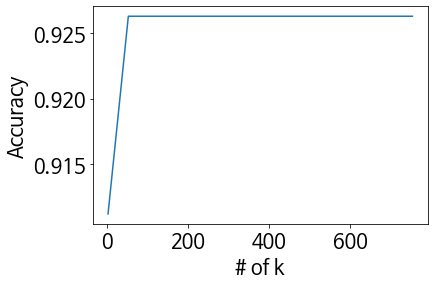

In [ ]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('# of k')
plt.ylabel('Accuracy')
plt.show()

**k=53 이후 cross_validation_score의 변화가 없으므로 k=53 미만의 숫자들로 다시 탐색**

In [ ]:
k_list = list(np.arange(3, 53, 2))  # k는 보통 홀수를 사용    
print(k_list, end='')    

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]

In [ ]:
cross_validation_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') 
    cross_validation_scores.append(scores.mean())

cross_validation_scores  

[0.9112499999999999,
 0.92125,
 0.925,
 0.9275,
 0.9256250000000001,
 0.9262500000000001,
 0.9256250000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001,
 0.9262500000000001]

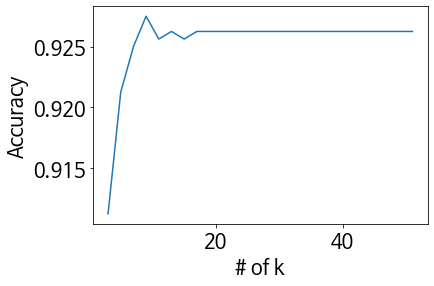

In [ ]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('# of k')
plt.ylabel('Accuracy')
plt.show()

**최적의 K 도출**

In [ ]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('the best number of k: ' + str(k))

the best number of k: 9


**모델 학습, 테스트, 결과 출력**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(metrics.classification_report(y_test, pred))   
print('accuracy: %.8f'% accuracy_score(y_test, pred))
comparison = pd.DataFrame({'ground_truth': y_test, 'prediction': pred})
comparison.head(10)

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       372
        True       0.33      0.04      0.06        28

    accuracy                           0.93       400
   macro avg       0.63      0.52      0.51       400
weighted avg       0.89      0.93      0.90       400

accuracy: 0.92750000


,ground_truth,prediction
874,False,False
1297,False,False
1448,False,False
1061,False,False
1139,False,False
1572,False,False
194,False,False
1429,False,False
1394,False,False
1563,False,False


### 기반 분류기 2: SVC

**라이브러리를 import하고, GridSearchCV로 최적의 하이퍼 파라미터를 도출하여 학습하기**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def svc_param_selection(x, y, nfolds):
    svm_parameters = [
                    {'kernel': ['rbf'],
                    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                    'C': [0.01, 0.1, 1, 10, 100, 1000]}
                    ]
    clf = GridSearchCV(SVC(probability=True), svm_parameters, cv=nfolds)
      # probability=True를 해줘야 소프트 보팅 앙상블에서 에러 발생 않음
    clf.fit(x, y)
    print(clf.best_params_)
    return clf

# 최적의 하이퍼 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(X_train, y_train, 10)   

{'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}


**모델 테스트 및 결과 출력**

In [ ]:
y_true, y_pred = y_test, clf.predict(X_test)
print(metrics.classification_report(y_true, y_pred))   
print('accuracy: %.8f'% accuracy_score(y_true, y_pred))

comparison = pd.DataFrame({'ground_truth': y_true, 'prediction': y_pred})
comparison.head(10)

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.00      0.00      0.00        28

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.86      0.93      0.90       400

accuracy: 0.93000000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,ground_truth,prediction
874,False,False
1297,False,False
1448,False,False
1061,False,False
1139,False,False
1572,False,False
194,False,False
1429,False,False
1394,False,False
1563,False,False


### 기반 분류기 3: 가우시안 나이브 베이즈

**모델 학습 및 테스트 결과 출력**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
expected = y_test
predicted = gnb.predict(X_test)
print(metrics.classification_report(expected, predicted))   
print('accuracy: %.8f'% accuracy_score(expected, predicted))

comparison = pd.DataFrame({'ground_truth': expected, 'prediction': predicted})
comparison.head(10)

              precision    recall  f1-score   support

       False       0.94      0.97      0.95       372
        True       0.20      0.11      0.14        28

    accuracy                           0.91       400
   macro avg       0.57      0.54      0.55       400
weighted avg       0.88      0.91      0.89       400

accuracy: 0.90750000


,ground_truth,prediction
874,False,False
1297,False,False
1448,False,False
1061,False,False
1139,False,False
1572,False,False
194,False,False
1429,False,False
1394,False,False
1563,False,False


### 기반 분류기 4: Light GBM 

**라이브러리 import, 모델 학습, 결과 출력**

In [ ]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=200)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                 eval_metric='logloss', eval_set=evals, verbose=False)    
    # early_stopping: 100회를 반복해도 손실이 감소하지 않으면 조기 중단
    # eval_set은 성능 평가를 수행할 평가용 데이터 셋을 설정
    # 조기 중단을 수행하려면 eval_set을 명기해야 함
    # 오류함수의 성능 평가 지표는 logloss
prediction = lgbm_wrapper.predict(X_test)
print(metrics.classification_report(y_test, prediction))   
print('accuracy: %.8f'% accuracy_score(y_test, prediction))

comparison = pd.DataFrame({'ground_truth': y_test, 'prediction': prediction})
comparison.head(10)

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       372
        True       0.50      0.07      0.12        28

    accuracy                           0.93       400
   macro avg       0.72      0.53      0.54       400
weighted avg       0.90      0.93      0.90       400

accuracy: 0.93000000


,ground_truth,prediction
874,False,False
1297,False,False
1448,False,False
1061,False,False
1139,False,False
1572,False,False
194,False,False
1429,False,False
1394,False,False
1563,False,False


**LGBM의 하이퍼 파라미터 변경 1**

In [ ]:
# learning rate 0.1(default) --> 0.05, n_estimators(반복 수행하는 트리의 개수) 200 --> 400, early_stopping 비적용
lgbm_wrapper1 = LGBMClassifier(n_estimators=400, learning_rate=0.05)

lgbm_wrapper1.fit(X_train, y_train, eval_metric='logloss',   # early_stopping_rounds=100 제거
                  verbose=False)             # 수행과정을 보이지 않음
prediction = lgbm_wrapper1.predict(X_test)
print('accuracy: %.8f'% accuracy_score(y_test, prediction))

accuracy: 0.92250000


**LGBM의 하이퍼 파라미터 변경 2**

이번에는 num_leaves(개별 트리가 가질 수 있는 최대 리프의 개수), min_data_in_leaf(리프 노드가 되기 위해 필요한 최소 레코드 수), max_depth를 조절하여 정확도 변화를 보겠습니다. 일반적으로 num_leaves 개수를 높이면 정확도가 높아지지만 과대적합 위험이 있다고 합니다. min_data_in_leaf를 크게 하면 트리가 깊어지는 것을 방지하여 과대적합을 방지하고, max_depth 또한 작게 하면 과대적합을 방지합니다.

In [ ]:
# num_leaves 31(default) --> 40 / min_data_in_leaf 20(default) --> 20 / max_depth -1(default) --> 20, 30, 40 all tried but accuracy stays the same
lgbm_wrapper2 = LGBMClassifier(num_leaves=40, min_data_in_leaf=20, max_depth=80, n_estimators=400, learning_rate=0.1)

lgbm_wrapper2.fit(X_train, y_train, eval_metric='logloss',
                 verbose=False)
prediction = lgbm_wrapper2.predict(X_test)
print('accuracy: %.8f'% accuracy_score(y_test, prediction))

accuracy: 0.92500000


**GridSearchCV를 이용한 하이퍼 파라미터 튜닝**

In [ ]:
def lgbm_param_selection(x, y, nfolds):
    lgbm_parameters = [
                    {'learning_rate': [0.05, 0.1, 0.15],
                    'n_estimators': [400, 800],
                    'num_leaves': [25, 31, 37],
                    'min_data_in_leaf': [15, 20, 25],
                    'max_depth': [-1, 50, 100]}
                    ]
    lgbm_grid = GridSearchCV(LGBMClassifier(eval_metric='logloss'), 
                             lgbm_parameters, cv=nfolds)
    lgbm_grid.fit(x, y)
    print(lgbm_grid.best_params_)
    return lgbm_grid

# 최적의 하이퍼 파라미터로 학습된 모델을 lgbm_grid로 저장 
# (교차검증은 3회)
lgbm_grid = lgbm_param_selection(X_train, y_train, 3)

prediction = lgbm_grid.predict(X_test)
print(metrics.classification_report(y_test, prediction))   
print('accuracy: %.8f'% accuracy_score(y_test, prediction))

{'learning_rate': 0.05, 'max_depth': -1, 'min_data_in_leaf': 20, 'n_estimators': 400, 'num_leaves': 37}
              precision    recall  f1-score   support

       False       0.93      0.99      0.96       372
        True       0.50      0.07      0.12        28

    accuracy                           0.93       400
   macro avg       0.72      0.53      0.54       400
weighted avg       0.90      0.93      0.90       400

accuracy: 0.93000000


### 학습된 기반 분류기로 보팅 앙상블 실행

**지금까지 학습시킨 기반 분류기 4개의 정확도**

In [ ]:
print('accuracy 비교')
print('KNN : %.8f' % accuracy_score(y_test, knn.predict(X_test)))
print('SVC : %.8f' % accuracy_score(y_test, clf.predict(X_test)))
print('GNB : %.8f' % accuracy_score(y_test, gnb.predict(X_test)))
print('LGBM: %.8f' % accuracy_score(y_test, lgbm_wrapper.predict(X_test)))

accuracy 비교
KNN : 0.92750000
SVC : 0.93000000
GNB : 0.90750000
LGBM: 0.93000000


**하드 보팅: 분류기별 가중치 1:1:0.5:1**

In [ ]:
hard4_voting_model0 = VotingClassifier(estimators=[
    ('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm_wrapper)],
    weights=[1,1,0.5,1], voting='hard')             
hard4_voting_model0.fit(X_train, y_train)
hard4_voting_predicted = hard4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, hard4_voting_predicted))   
accuracy_score(y_test, hard4_voting_predicted)

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       1.00      0.04      0.07        28

    accuracy                           0.93       400
   macro avg       0.97      0.52      0.52       400
weighted avg       0.94      0.93      0.90       400



0.9325

**하드 보팅: 분류기별 가중치 1:1:1:1**

In [ ]:
hard4_voting_model1 = VotingClassifier(estimators=[
    ('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm_wrapper)],
    weights=[1,1,1,1], voting='hard')             
hard4_voting_model1.fit(X_train, y_train)
hard4_voting_predicted = hard4_voting_model1.predict(X_test)
print(metrics.classification_report(y_test, hard4_voting_predicted))   
accuracy_score(y_test, hard4_voting_predicted)

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.00      0.00      0.00        28

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.86      0.93      0.90       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.93

**하드 보팅: 분류기별 가중치 1:1:2:1**

In [ ]:
hard4_voting_model2 = VotingClassifier(estimators=[
    ('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm_wrapper)],
    weights=[1,1,2,1], voting='hard')             
hard4_voting_model2.fit(X_train, y_train)
hard4_voting_predicted = hard4_voting_model2.predict(X_test)
print(metrics.classification_report(y_test, hard4_voting_predicted))   
accuracy_score(y_test, hard4_voting_predicted)

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.50      0.04      0.07        28

    accuracy                           0.93       400
   macro avg       0.72      0.52      0.52       400
weighted avg       0.90      0.93      0.90       400



0.93

**하드 보팅: 기반 분류기를 나이브 베이즈와 LGBM만 사용하여 True값의 재현율 향상 시도(정확도는 하락)**

In [ ]:
hard2_voting_model = VotingClassifier(estimators=[
    ('Gaussian Naive Bayes', gnb), ('LGBM', lgbm_wrapper)],
    weights=[1,1], voting='hard')              
hard2_voting_model.fit(X_train, y_train)
hard2_voting_predicted = hard2_voting_model.predict(X_test)
print(metrics.classification_report(y_test, hard2_voting_predicted))   
accuracy_score(y_test, hard2_voting_predicted)

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.50      0.04      0.07        28

    accuracy                           0.93       400
   macro avg       0.72      0.52      0.52       400
weighted avg       0.90      0.93      0.90       400



0.93

**소프트 보팅: 분류기별 가중치 1:1:0.5:1**

In [ ]:
# 소프트 보팅 1:1:0.5:1
soft4_voting_model0 = VotingClassifier(estimators=[
    ('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm_wrapper)],
    weights=[1,1,0.5,1], voting='soft')
soft4_voting_model0.fit(X_train, y_train)
soft4_voting_predicted = soft4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, soft4_voting_predicted))   
accuracy_score(y_test, soft4_voting_predicted)

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.00      0.00      0.00        28

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.86      0.93      0.90       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.93

**소프트 보팅: 분류기별 가중치 1:1:1:1**

In [ ]:
soft4_voting_model1 = VotingClassifier(estimators=[
    ('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm_wrapper)],
    weights=[1,1,1,1], voting='soft')
soft4_voting_model1.fit(X_train, y_train)
soft4_voting_predicted = soft4_voting_model1.predict(X_test)
print(metrics.classification_report(y_test, soft4_voting_predicted))   
accuracy_score(y_test, soft4_voting_predicted)

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       372
        True       0.00      0.00      0.00        28

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.86      0.93      0.90       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.93

**소프트 보팅: 분류기별 가중치 1:1:2:1**

In [ ]:
soft4_voting_model2 = VotingClassifier(estimators=[
    ('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm_wrapper)],
    weights=[1,1,2,1], voting='soft')
soft4_voting_model2.fit(X_train, y_train)
soft4_voting_predicted = soft4_voting_model2.predict(X_test)
print(metrics.classification_report(y_test, soft4_voting_predicted))   
accuracy_score(y_test, soft4_voting_predicted)

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       372
        True       0.33      0.04      0.06        28

    accuracy                           0.93       400
   macro avg       0.63      0.52      0.51       400
weighted avg       0.89      0.93      0.90       400



0.9275

**소프트 보팅, 기반 분류기를 KNN, 나이브 베이즈, LGBM의 3개만 사용하여 True값의 재현율 향상 시도(정확도는 하락)**

In [ ]:
soft3_voting_model = VotingClassifier(estimators=[
    ('KNN', knn), ('Gaussian Naive Bayes', gnb), ('Light GBM', lgbm_wrapper)],
    weights=[1,2,1], voting='soft')
soft3_voting_model.fit(X_train, y_train)
soft3_voting_predicted = soft3_voting_model.predict(X_test)
print(metrics.classification_report(y_test, soft3_voting_predicted))  
accuracy_score(y_test, soft3_voting_predicted)

              precision    recall  f1-score   support

       False       0.94      0.97      0.95       372
        True       0.23      0.11      0.15        28

    accuracy                           0.91       400
   macro avg       0.58      0.54      0.55       400
weighted avg       0.89      0.91      0.90       400



0.9125

# 3-1. 랜덤 포레스트: 하이퍼 파라미터 설정 없이 학습하기

**라이브러리 import, 모델 학습 및 테스트 결과 출력**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 10)  
 # 일관성 유지 위해 random_state 설정
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
print(metrics.classification_report(y_test, rf_pred))   
accuracy_rf = accuracy_score(y_test, rf_pred)
print('random forest accuracy: {0:.8f}'.format(accuracy_rf))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       372
        True       0.40      0.07      0.12        28

    accuracy                           0.93       400
   macro avg       0.67      0.53      0.54       400
weighted avg       0.90      0.93      0.90       400

random forest accuracy: 0.92750000


**모델 하이퍼 파라미터 확인**

In [ ]:
print(rf_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)


**참고: 특징 중요도 확인**

           data
성별     0.019259
연령     0.083290
시도     0.101772
혈압     0.145233
LDL    0.189379
크레아티닌  0.099799
ALT    0.183415
흡연     0.037497
체질량    0.140355


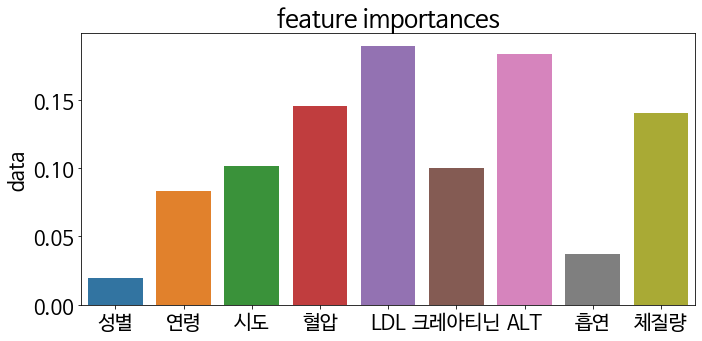

In [ ]:
ft_importances_values = rf_clf.feature_importances_
ft_importances_df = pd.DataFrame(ft_importances_values, index=X_train.columns, columns=['data'])
print(ft_importances_df)
plt.figure(figsize=(11,5))
plt.title('feature importances')
sns.barplot(x=ft_importances_df.index, y=ft_importances_df['data'])
plt.show()

# 3-2. 랜덤 포레스트: 하이퍼 파라미터 설정하여 학습하기

**GridSearchCV를 사용하여 최적의 하이퍼 파라미터 탐색**

In [ ]:
rf_param_grid = {
    'n_estimators': [80, 100, 120],   # 모델에서 사용할 트리 개수
    'min_samples_leaf': [1,2,3],      # 리프 노드가 되기 위한 최소 샘플 데이터 개수
    'min_samples_split': [2,3,4]      # 자식 노드를 갖기 위한 최소 데이터 개수
}
rf_clf1 = RandomForestClassifier(random_state = 10)   
grid = GridSearchCV(rf_clf1, param_grid = rf_param_grid,
                   scoring='accuracy', n_jobs=1)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                               

In [ ]:
rf_grid_pred = grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, rf_grid_pred)
print('rf_grid accuracy: {0:.8f}'.format(accuracy_grid))    
print(grid.best_params_)

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       372
        True       0.50      0.07      0.12        28

    accuracy                           0.93       400
   macro avg       0.72      0.53      0.54       400
weighted avg       0.90      0.93      0.90       400

rf_grid accuracy: 0.93000000
{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}


# 4-1. 케라스 로지스틱 회귀: 하이퍼 파라미터 설정 없이 학습하기

**라이브러리 import**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
import tensorflow as tf

**실행할 때마다 같은 결과를 얻기 위해 seed 설정**

In [ ]:
np.random.seed(3)
tf.random.set_seed(3)

**모델 설정, 학습 및 결과 출력**

In [ ]:
LoR = Sequential()
LoR.add(Dense(input_dim=9, units=1))   # 입력값 9개, 출력값 1개
LoR.add(Activation('sigmoid'))         
 # 히든 레이어의 출력값을 시그모이드에 연결
LoR.compile(loss='binary_crossentropy', optimizer='sgd', 
            metrics=['binary_accuracy'])  
 # 비용함수는 크로스 엔트로피, 경사하강법으로 학습

In [ ]:
LoR.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
print('Accuracy: %.8f' % (LoR.evaluate(X_test, y_test)[1]))     
 # 케라스는 정확도 표시를 위해 evaluate을 씀

13/13 [==============================] - 0s 1ms/step - loss: 1.6556 - binary_accuracy: 0.8575
Accuracy: 0.85750002


In [ ]:
LoR.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 10        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LoR.layers[0].get_weights()  # 회귀계수(w,b) 값 보기

[array([[-1.1399403 ],
        [ 0.5295256 ],
        [-0.20230809],
        [ 0.0191874 ],
        [-0.21182269],
        [ 0.5417293 ],
        [ 0.34067467],
        [ 0.06938538],
        [-0.8452538 ]], dtype=float32), array([-0.10288844], dtype=float32)]

# 4-2. 케라스 로지스틱 회귀: 하이퍼 파라미터 설정 및 히든 레이어 추가

**히든 레이어 추가. 레이어별 노드 수를 각각 12개, 8개, 1개로 잡고, Dropout=20%, optimizer=adam**


In [ ]:
LoR1 = Sequential()
LoR1.add(Dense(12, input_dim=9, activation='relu'))
LoR1.add(Dense(8, activation='relu'))
LoR1.add(Dropout(0.2))     # 두 번째 히든 레이어에 드롭아웃 20% 적용
LoR1.add(Dense(1, activation='sigmoid'))

LoR1.compile(loss='binary_crossentropy', optimizer='adam', 
             metrics=['binary_accuracy'])
LoR1.fit(X_train, y_train, epochs=100, verbose=0)
print('Accuracy: %.8f' % (LoR1.evaluate(X_test, y_test)[1]))    

13/13 [==============================] - 0s 1ms/step - loss: 0.2620 - binary_accuracy: 0.9300
Accuracy: 0.93000001


**레이어별 노드 수를 증가시켜서 24개, 16개, 1개로. Dropout=10% (optimizer=adam 유지)**

In [ ]:
LoR2 = Sequential()
LoR2.add(Dense(24, input_dim=9, activation='relu'))
LoR2.add(Dense(16, activation='relu'))
LoR2.add(Dropout(0.1))     
LoR2.add(Dense(1, activation='sigmoid'))

LoR2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
LoR2.fit(X_train, y_train, epochs=100, verbose=0)
print('Accuracy: %.8f' % (LoR2.evaluate(X_test, y_test)[1]))    

13/13 [==============================] - 0s 1ms/step - loss: 0.2827 - binary_accuracy: 0.9300
Accuracy: 0.93000001


**레이어별 노드 수를 변화시켜서 각각 30개, 6개, 1개로. batch_size=64 (Dropout=10%, optimizer=adam 유지)**

In [ ]:
LoR3 = Sequential()
LoR3.add(Dense(30, input_dim=9, activation='relu'))
LoR3.add(Dense(6, activation='relu'))
LoR3.add(Dropout(0.3))     
LoR3.add(Dense(1, activation='sigmoid'))

LoR3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
LoR3.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
print('Accuracy: %.8f' % (LoR3.evaluate(X_test, y_test)[1]))  

13/13 [==============================] - 0s 1ms/step - loss: 0.2589 - binary_accuracy: 0.9300
Accuracy: 0.93000001


**Dropout=20%, batch_size=64 (레이어별 노드 30/6/1, optimizer=adam 유지)**

In [ ]:
LoR4 = Sequential()
LoR4.add(Dense(30, input_dim=9, activation='relu'))
LoR4.add(Dense(6, activation='relu'))
LoR4.add(Dropout(0.2))     
LoR4.add(Dense(1, activation='sigmoid'))

LoR4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
LoR4.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
print('Accuracy: %.8f' % (LoR4.evaluate(X_test, y_test)[1]))  

13/13 [==============================] - 0s 1ms/step - loss: 0.2994 - binary_accuracy: 0.9300
Accuracy: 0.93000001


#  5 추가: 데이터 건수를 1만 개로 늘려서 LGBM과 로지스틱 회귀(Keras)의 정확도 개선 여부 확인

**Light GBM은 1만 건 이하의 데이터 셋에서 과대적합이 발생하기 쉽다고 합니다. 데이터 건수를 2천개에서 1만 개로 늘려 보겠습니다**

In [ ]:
dfm = df_10k
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10969 entries, 0 to 10999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      10969 non-null  int64  
 1   연령      10969 non-null  int64  
 2   시도      10969 non-null  int64  
 3   신장      10969 non-null  float64
 4   체중      10969 non-null  float64
 5   혈압      10969 non-null  float64
 6   혈당      10969 non-null  int64  
 7   LDL     10969 non-null  float64
 8   크레아티닌   10969 non-null  float64
 9   ALT     10969 non-null  int64  
 10  흡연      10969 non-null  float64
 11  체질량     10969 non-null  float64
 12  당뇨      10969 non-null  bool   
dtypes: bool(1), float64(7), int64(5)
memory usage: 1.1 MB


In [ ]:
X1 = dfm[['성별', '연령', '시도', '혈압', 'LDL', '크레아티닌', 'ALT', '흡연', '체질량']]
y1 = dfm['당뇨']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=45)

In [ ]:
lgbm_wrapper10 = LGBMClassifier(n_estimators=200)

evals1 = [(X1_test, y1_test)]
lgbm_wrapper10.fit(X1_train, y1_train, early_stopping_rounds=100, eval_metric='logloss',
                 eval_set=evals1, verbose=False)
pred1 = lgbm_wrapper10.predict(X1_test)

print(metrics.classification_report(y1_test, pred1))  
print('accuracy: %.8f'% accuracy_score(y1_test, pred1))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96      2016
        True       0.00      0.00      0.00       178

    accuracy                           0.92      2194
   macro avg       0.46      0.50      0.48      2194
weighted avg       0.84      0.92      0.88      2194

accuracy: 0.91841386


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=15)

lgbm_wrapper11 = LGBMClassifier(n_estimators=200)

evals1 = [(X1_test, y1_test)]
lgbm_wrapper11.fit(X1_train, y1_train, early_stopping_rounds=100, eval_metric='logloss',
                 eval_set=evals1, verbose=False)
pred1 = lgbm_wrapper11.predict(X1_test)
print('accuracy: %.8f'% accuracy_score(y1_test, pred1))

accuracy: 0.92752963


 **--> 데이터 건수가 1만개로 늘었다고 해서 정확도가 개선되지는 않음**

**로지스틱 회귀의 데이터 건수를 1만 개로 하여 정확도가 향상되는지 확인**

In [ ]:
# 앞서 최고의 정확도를 보였던 설정 사용: 레이어별 노드 수 각각 24개, 16개, 1개. Dropout=10%, batch_size=32, optimizer=adam
LoR10 = Sequential()
LoR10.add(Dense(24, input_dim=9, activation='relu'))
LoR10.add(Dense(16, activation='relu'))
LoR10.add(Dropout(0.1))     
LoR10.add(Dense(1, activation='sigmoid'))

LoR10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
LoR10.fit(X1_train, y1_train, epochs=100, batch_size=32, verbose=0)
print('Accuracy: %.8f' % (LoR10.evaluate(X1_test, y1_test)[1]))  

69/69 [==============================] - 0s 896us/step - loss: 0.2354 - binary_accuracy: 0.9284
Accuracy: 0.92844123


In [ ]:
############### 레이어별 노드 수 각각 30개, 6개, 1개. Dropout=20%, batch_size=64 (optimizer=adam)
LoR11 = Sequential()
LoR11.add(Dense(30, input_dim=9, activation='relu'))
LoR11.add(Dense(6, activation='relu'))
LoR11.add(Dropout(0.2))     
LoR11.add(Dense(1, activation='sigmoid'))

LoR11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
LoR11.fit(X1_train, y1_train, epochs=100, batch_size=64, verbose=0)
print('Accuracy: %.8f' % (LoR11.evaluate(X1_test, y1_test)[1]))  

69/69 [==============================] - 0s 910us/step - loss: 0.2408 - binary_accuracy: 0.9280
Accuracy: 0.92798543


In [ ]:
############### 레이어별 노드 수를 각각 12개, 8개, 1개로 잡고, batch_size=default(32) (Dropout=20%, optimizer=adam)
LoR12 = Sequential()
LoR12.add(Dense(12, input_dim=9, activation='relu'))
LoR12.add(Dense(8, activation='relu'))
LoR12.add(Dropout(0.2))     # 두 번째 히든 레이어에 드롭아웃 20% 적용
LoR12.add(Dense(1, activation='sigmoid'))

LoR12.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
LoR12.fit(X1_train, y1_train, epochs=100, verbose=0)
print('Accuracy: %.8f' % (LoR12.evaluate(X1_test, y1_test)[1]))  

69/69 [==============================] - 0s 964us/step - loss: 0.2364 - binary_accuracy: 0.9284
Accuracy: 0.92844123


**--> 데이터 건수가 1만개로 늘었다고 해서 정확도가 개선되지는 않음**

# 5 기타: Keras 로지스틱 회귀를 보팅 앙상블의 기본 분류기로 포함시키기 시도 --> 에러 발생함

In [ ]:
voting_model = VotingClassifier(estimators=[
    ('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb), ('Logistic Regression Keras', LoR)],
    weights=[1,1,1,1], voting='soft')
voting_model.fit(X_train, y_train)
soft_voting_predicted = voting_model.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

ValueError: ignored

# 5 기타: 정확도 비교 그래프

**지금까지 학습시킨 알고리즘들의 정확도 비교**

In [ ]:
print('accuracy 비교')
print('hard voting raw: %.8f' % accuracy_score(y_test, hard_voting_model.predict(X_test)))
print('soft voting raw: %.8f' % accuracy_score(y_test, soft_voting_model.predict(X_test)))
print('')
print('K      N      N: %.8f' % accuracy_score(y_test, knn.predict(X_test)))
print('S      V      C: %.8f' % accuracy_score(y_test, clf.predict(X_test)))
print('Gaussian   N  B: %.8f' % accuracy_score(y_test, gnb.predict(X_test)))
print('light   G  B  M: %.8f' % accuracy_score(y_test, lgbm_wrapper.predict(X_test)))
print('hard voting  up: %.8f' % accuracy_score(y_test, hard4_voting_model0.predict(X_test)))
print('soft voting  up: %.8f' % accuracy_score(y_test, soft4_voting_model0.predict(X_test)))
print('')
print('Random   Forest: %.8f' % accuracy_score(y_test, grid.predict(X_test)))    
print('')
print('LogisticR.Keras: %.8f' % LoR1.evaluate(X_test, y_test, verbose=0)[1])    

accuracy 비교
hard voting raw: 0.93000000
soft voting raw: 0.92750000

K      N      N: 0.92750000
S      V      C: 0.93000000
Gaussian   N  B: 0.90750000
light   G  B  M: 0.93000000
hard voting  up: 0.93250000
soft voting  up: 0.93000000

Random   Forest: 0.93000000

LogisticR.Keras: 0.93000001


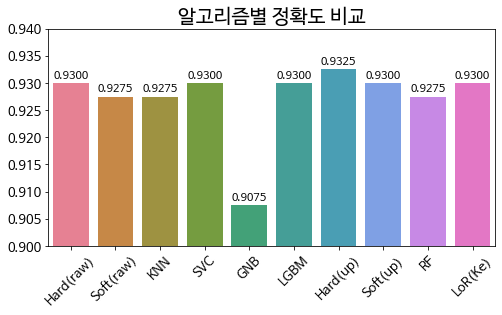

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
x_data = np.arange(10)  # [0, 1, 2, 3...9] 배열을 x에 대입하여 선언
y_data = [accuracy_score(y_test, hard_voting_model.predict(X_test)),
                    accuracy_score(y_test, soft_voting_model.predict(X_test)),
                    accuracy_score(y_test, knn.predict(X_test)),
                    accuracy_score(y_test, clf.predict(X_test)),
                    accuracy_score(y_test, gnb.predict(X_test)),
                    accuracy_score(y_test, lgbm_wrapper.predict(X_test)),
                    accuracy_score(y_test, hard4_voting_model0.predict(X_test)),
                    accuracy_score(y_test, soft4_voting_model0.predict(X_test)),
                    accuracy_score(y_test, rf_clf.predict(X_test)),
                    LoR1.evaluate(X_test, y_test, verbose=0)[1]] 
g = sns.barplot(ax=ax, palette='husl', x=x_data, y=y_data)
g.set_xticklabels(['Hard(raw)','Soft(raw)', 'KNN', 'SVC', 'GNB', 'LGBM', 
                   'Hard(up)', 'Soft(up)', 'RF', 'LoR(Ke)'], rotation=45)  
                   # x축 레이블 설정
g.set(ylim=(0.90, 0.94))
g.tick_params(labelsize=13)    # X축과 Y축의 레이블 폰트 크기 설정
g.axes.set_title('알고리즘별 정확도 비교', fontsize=20)
for p in g.patches:            # 막대 위에 숫자를 표시
    g.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 8), 
                   textcoords = 'offset points', size=11) 
plt.show()